<a href="https://colab.research.google.com/github/ahmeda335/Deep_Learning_Projects/blob/main/Training_Model_Using_RNN_%26_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries and Setting Global Variables.

In [77]:
import csv
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional,SimpleRNN
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
vocab_size = 5000
embedding_dim = 64
oov_tok = '<OOV>' #  Out of Vocabulary
training_portion = 0.8

# Reading the Data And Preprocessing.

In [23]:
articles = []
labels = []

with open("/content/Data.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[1])
        article = row[0]
        for word in STOPWORDS:
            token = ' ' + word + ' '   # This is important to remove 'in' but not 'in'effecient.
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)

In [24]:
len(labels), len(articles)

(2225, 2225)

In [69]:
set(labels)

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [25]:
labels[0], articles[0]

('entertainment',
 'Musicians tackle US red tape  Musicians groups tackle US visa regulations blamed hindering British acts chances succeeding across Atlantic.  A singer hoping perform US expect pay $1,300 (xc2xa3680) simply obtaining visa. Groups including Musicians Union calling end "raw deal" faced British performers. US acts faced comparable expense bureaucracy visiting UK promotional purposes.  Nigel McCune Musicians Union said British musicians "disadvantaged" compared US counterparts. A sponsor make petition behalf, form amounting nearly 30 pages, musicians face tougher regulations athletes journalists. "If make mistake form, risk five-year ban thus ability career," says Mr McCune.  "The US worlds biggest music market, means something done creaky bureaucracy," says Mr McCune. "The current situation preventing British acts maintaining momentum developing US," added.  The Musicians Union stance endorsed Music Managers Forum (MMF), say British artists face "an uphill struggle" succ

In [ ]:
# Shuffling the data.
combined = list(zip(labels, articles))

random.seed(42)
random.shuffle(combined)

print(combined)
labels, articles = zip(*combined)



labels = list(labels)
articles = list(articles)

# labels
# articles

In [28]:
# Dividing my data into train part and validation part.
train_size = int(training_portion * len(labels))

train_articles = articles[:train_size]
train_labels = labels[:train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

In [29]:
print('train_articles' ,len(train_articles))
print('train_labels', len(train_labels))
print('validation_articles', len(validation_articles))
print('validation_labels', len(validation_labels))

train_articles 1780
train_labels 1780
validation_articles 445
validation_labels 445


In [50]:
article_tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
article_tokenizer.fit_on_texts(articles)
word_index = article_tokenizer.word_index

In [51]:
word_index

{'<OOV>': 1,
 'the': 2,
 'said': 3,
 'i': 4,
 'mr': 5,
 'would': 6,
 'also': 7,
 'it': 8,
 'year': 9,
 'new': 10,
 'people': 11,
 'us': 12,
 'one': 13,
 'but': 14,
 'he': 15,
 'could': 16,
 'last': 17,
 'first': 18,
 'time': 19,
 'two': 20,
 'in': 21,
 'years': 22,
 'a': 23,
 'government': 24,
 'world': 25,
 'we': 26,
 'uk': 27,
 'best': 28,
 'make': 29,
 'told': 30,
 'get': 31,
 'like': 32,
 'film': 33,
 'made': 34,
 'back': 35,
 'game': 36,
 'music': 37,
 'many': 38,
 'three': 39,
 '000': 40,
 'well': 41,
 'next': 42,
 '1': 43,
 'set': 44,
 'number': 45,
 'take': 46,
 'way': 47,
 'added': 48,
 'this': 49,
 'bbc': 50,
 'and': 51,
 'market': 52,
 '2': 53,
 'says': 54,
 'may': 55,
 'home': 56,
 'election': 57,
 'labour': 58,
 'games': 59,
 'good': 60,
 'going': 61,
 '2004': 62,
 'still': 63,
 'much': 64,
 'company': 65,
 'there': 66,
 'win': 67,
 '6': 68,
 'go': 69,
 'since': 70,
 'work': 71,
 'second': 72,
 'top': 73,
 'think': 74,
 'use': 75,
 'say': 76,
 'show': 77,
 'million': 78,
 

In [52]:
len(word_index)

30935

In [60]:
# Converting articles to numbers
train_sequences = tokenizer.texts_to_sequences(train_articles)
validation_sequences = tokenizer.texts_to_sequences(validation_articles)

len(train_sequences), len(validation_sequences)

(1780, 445)

In [54]:
train_sequences[0]

[12,
 102,
 694,
 799,
 1383,
 23,
 12,
 614,
 428,
 824,
 2404,
 102,
 694,
 1409,
 799,
 1383,
 1042,
 333,
 1246,
 1,
 2064,
 1,
 2361,
 1100,
 130,
 77,
 3380,
 1101,
 2065,
 500,
 259,
 640,
 1,
 1,
 1,
 2005,
 1,
 40,
 2,
 378,
 1247,
 913,
 465,
 4497,
 2774,
 1781,
 1,
 541,
 2453,
 1,
 762,
 1653,
 2833,
 2588,
 37,
 608,
 658,
 722,
 1829,
 26,
 1466,
 25,
 1,
 1,
 914,
 1528,
 2,
 542,
 407,
 533,
 297,
 2649,
 1158,
 1,
 555,
 541,
 1548,
 4216,
 126,
 1136,
 156,
 1,
 40,
 11,
 2066,
 98,
 78,
 257,
 1,
 199,
 1634,
 2148,
 1,
 963,
 1,
 665,
 4359,
 1,
 1,
 2067,
 410,
 239,
 2,
 246,
 228,
 455,
 45,
 2066,
 1136,
 16,
 251,
 3929,
 541,
 348,
 931,
 2954,
 779,
 4498,
 348,
 897,
 1,
 541,
 1383,
 1409,
 264,
 160,
 8,
 1782,
 20,
 1100,
 1,
 1747,
 110,
 322,
 12,
 614,
 501,
 97,
 261,
 410,
 593,
 1183,
 645,
 521,
 1091,
 23,
 2775,
 1,
 1169,
 1,
 1,
 146,
 1548,
 3930,
 645,
 25,
 355,
 4499,
 1]

In [61]:
len(train_sequences[0]), len(validation_sequences[0])

(159, 128)

In [62]:
# Getting the average of lengths of all train sequences
lengths = []
for sequence in train_sequences + validation_sequences:
  lengths.append(len(sequence))

avg_length = int(sum(lengths) / len(lengths))
avg_length

244

In [65]:
# Padding all articles such that all of them has the same length.
train_padded = pad_sequences(train_sequences, maxlen=avg_length)
validation_padded = pad_sequences(validation_sequences, maxlen=avg_length)

In [66]:
len(train_padded[2])

244

In [68]:
train_padded[0], validation_padded[0]   # Note: the padded items are put in the start of the sequence.

(array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   12,  102,  694,
         799, 1383,   23,   12,  614,  428,  824, 2404,  102,  694, 1409,
         799, 1383, 1042,  333, 1246,    1, 2064,    1, 2361, 1100,  130,
          77, 3380, 1101, 2065,  500,  259,  640,    1,    1,    1, 2005,
           1,   40,    2,  378, 1247,  913,  465, 4497, 2774, 1781,    1,
         541, 2453,    1,  762, 1653, 2833, 2588,   37,  608,  658,  722,
        1829,   26, 1466,   25,    1, 

In [70]:
set(labels)

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [88]:
label_tokenizer = Tokenizer(num_words=5 + 1)  # I put 6 here not 5 such that if it is not a label from them.
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [89]:
training_label_seq[0]

array([5])

# Using RNN Model.

In [76]:
RNN_Model = Sequential()
RNN_Model.add(Embedding(vocab_size,embedding_dim ))
RNN_Model.add(Dropout(0.2))
RNN_Model.add(SimpleRNN(units = embedding_dim))
RNN_Model.add(Dropout(0.2))
RNN_Model.add(Dense(6,activation='softmax'))
RNN_Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [79]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)
RNN_Model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [80]:
num_epochs = 20
history = RNN_Model.fit(train_padded, training_label_seq, epochs=num_epochs,
                    validation_data=(validation_padded, validation_label_seq),
                    verbose=2)

Epoch 1/20
56/56 - 9s - 158ms/step - accuracy: 0.2365 - loss: 1.6650 - val_accuracy: 0.2831 - val_loss: 1.6014
Epoch 2/20
56/56 - 1s - 21ms/step - accuracy: 0.5034 - loss: 1.3940 - val_accuracy: 0.3056 - val_loss: 1.5581
Epoch 3/20
56/56 - 1s - 20ms/step - accuracy: 0.7787 - loss: 0.9609 - val_accuracy: 0.3213 - val_loss: 1.5649
Epoch 4/20
56/56 - 1s - 18ms/step - accuracy: 0.9506 - loss: 0.4230 - val_accuracy: 0.3596 - val_loss: 1.6388
Epoch 5/20
56/56 - 1s - 23ms/step - accuracy: 0.9966 - loss: 0.1433 - val_accuracy: 0.3393 - val_loss: 1.8401
Epoch 6/20
56/56 - 1s - 19ms/step - accuracy: 1.0000 - loss: 0.0573 - val_accuracy: 0.3438 - val_loss: 1.8675
Epoch 7/20
56/56 - 1s - 19ms/step - accuracy: 1.0000 - loss: 0.0330 - val_accuracy: 0.3348 - val_loss: 1.9945
Epoch 8/20
56/56 - 1s - 19ms/step - accuracy: 1.0000 - loss: 0.0210 - val_accuracy: 0.3461 - val_loss: 2.0099
Epoch 9/20
56/56 - 1s - 22ms/step - accuracy: 1.0000 - loss: 0.0163 - val_accuracy: 0.3438 - val_loss: 2.0673
Epoch 10/

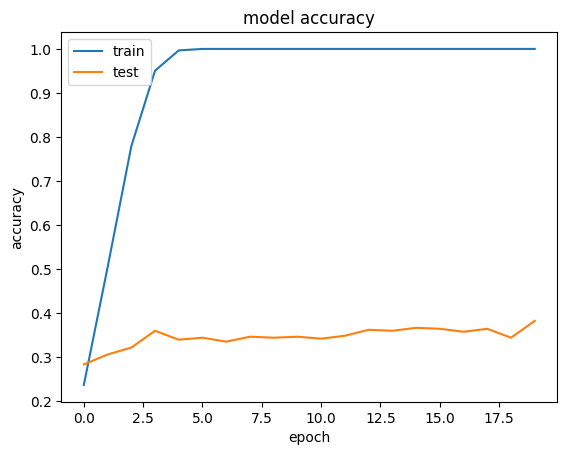

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Using LSTM Model.

In [90]:
LSTM_Model = Sequential()
LSTM_Model.add(Embedding(vocab_size,embedding_dim ))
LSTM_Model.add(Dropout(0.5))
LSTM_Model.add(Bidirectional(LSTM(embedding_dim)))
LSTM_Model.add(Dense(6,activation='softmax' ))
LSTM_Model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [91]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)
LSTM_Model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [92]:
num_epochs = 20
history = LSTM_Model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/20
56/56 - 4s - 70ms/step - accuracy: 0.2798 - loss: 1.5902 - val_accuracy: 0.2742 - val_loss: 1.5329
Epoch 2/20
56/56 - 1s - 19ms/step - accuracy: 0.4022 - loss: 1.3670 - val_accuracy: 0.4674 - val_loss: 1.1506
Epoch 3/20
56/56 - 1s - 19ms/step - accuracy: 0.6270 - loss: 1.0239 - val_accuracy: 0.5888 - val_loss: 1.1749
Epoch 4/20
56/56 - 1s - 22ms/step - accuracy: 0.7146 - loss: 0.8869 - val_accuracy: 0.7101 - val_loss: 0.8933
Epoch 5/20
56/56 - 1s - 26ms/step - accuracy: 0.6933 - loss: 0.8513 - val_accuracy: 0.4921 - val_loss: 1.2768
Epoch 6/20
56/56 - 2s - 28ms/step - accuracy: 0.7713 - loss: 0.8073 - val_accuracy: 0.7708 - val_loss: 0.7146
Epoch 7/20
56/56 - 1s - 19ms/step - accuracy: 0.8281 - loss: 0.6635 - val_accuracy: 0.8112 - val_loss: 0.6940
Epoch 8/20
56/56 - 1s - 22ms/step - accuracy: 0.9388 - loss: 0.3191 - val_accuracy: 0.8944 - val_loss: 0.4046
Epoch 9/20
56/56 - 1s - 22ms/step - accuracy: 0.9298 - loss: 0.2673 - val_accuracy: 0.8427 - val_loss: 0.5257
Epoch 10/2

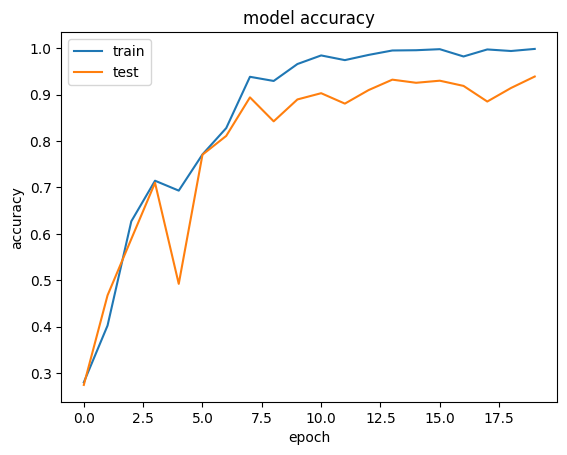

In [93]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

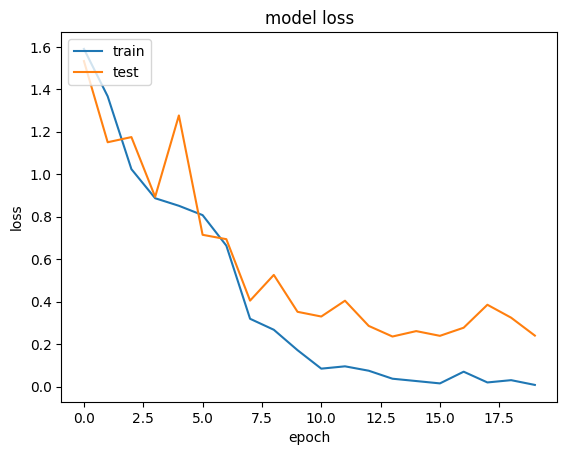

In [94]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()